# Importación de librerias

In [12]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lectura de archivos 

In [13]:
d = path.dirname(".")

# Read the whole text.
text = open(path.join(d, 'Don Quijote, by Miguel de Cervantes Saavedra.txt'), encoding="utf8").read()
stop_words = open(path.join(d, 'spanish.txt'), encoding="utf8").read()

# stop words url: https://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/

# Limpieza de texto

In [14]:
from string import punctuation
import string

filtered_text = text

filtered_text = filtered_text.split("*** START OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[1]
filtered_text = filtered_text.split("*** END OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[0]

# lower to get better comparison
filtered_text = filtered_text.lower()
stop_words = stop_words.lower()

# added punctuation symbols used in spanish
punctuation = punctuation + '¿¡'

# apply filters
filtered_text = ''.join(c for c in filtered_text if c not in punctuation)
filtered_text = ' '.join([word for word in filtered_text.split() if word not in stop_words])

In [15]:
# filtered_text

# Palabras mas frecuentes

In [16]:
from collections import Counter
Counter(filtered_text.split()).most_common()[:20]

[('quijote', 2176),
 ('sancho', 2148),
 ('dijo', 1807),
 ('señor', 1063),
 ('respondió', 1062),
 ('así', 1061),
 ('merced', 899),
 ('pues', 862),
 ('sino', 694),
 ('caballero', 661),
 ('decir', 578),
 ('hacer', 535),
 ('dios', 531),
 ('aunque', 530),
 ('aquí', 516),
 ('señora', 515),
 ('aquel', 487),
 ('mal', 459),
 ('cosa', 447),
 ('buen', 442)]

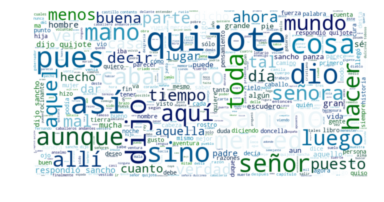

In [17]:
wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(filtered_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

# Cantidad de palabras en texto filtrado

In [26]:
len(filtered_text.split(" "))

172640

#  Cantidad de caracteres en texto filtrado

In [18]:
print(len(filtered_text))

1272298


#  Comparación de wordcloud limpiando texto con textacy

In [19]:
import textacy
import textacy.datasets
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

In [20]:
textacy_text = text

textacy_text = textacy_text.split("*** START OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[1]
textacy_text = textacy_text.split("*** END OF THIS PROJECT GUTENBERG EBOOK DON QUIJOTE ***")[0]

textacy_text = textacy.preprocess.normalize_whitespace(textacy_text)

textacy_text = ' '.join([word for word in textacy_text.split() if word not in STOP_WORDS])

In [21]:
from collections import Counter
Counter(textacy_text.split()).most_common()[:20]

[('y', 15894),
 ('a', 9519),
 ('don', 2533),
 ('y,', 1250),
 ('o', 1159),
 ('que,', 1069),
 ('Sancho', 950),
 ('Quijote', 893),
 ('-dijo', 873),
 ('-respondió', 813),
 ('señor', 732),
 ('merced', 678),
 ('Y', 595),
 ('Quijote,', 530),
 ('Sancho,', 481),
 ('dijo:', 457),
 ('así,', 405),
 ('cosa', 380),
 ('caballero', 379),
 ('señora', 363)]

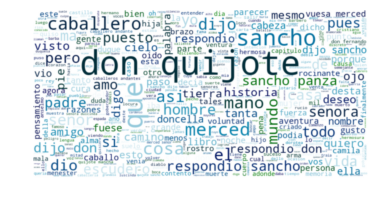

In [29]:
textacy_text=textacy.preprocess.preprocess_text(textacy_text, fix_unicode=True, lowercase=True, transliterate=False, no_urls=True, no_emails=True, no_phone_numbers=True, no_numbers=False, no_currency_symbols=True, no_punct=True, no_contractions=True, no_accents=True)

wordcloud = WordCloud(width=800,height=400,max_font_size=80,background_color="white",max_words=500,colormap="ocean").generate(textacy_text)
plt.figure()
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis("off")
plt.show()

# Cantidad de palabras en texto filtrado

In [27]:
len(textacy_text.split(" "))

192037

#  Cantidad de caracteres en texto filtrado

In [23]:
print(len(textacy_text))

1252902


# Extracción de personajes

In [ ]:
nlp = spacy.load('es')
doc = nlp(textacy_text[:20000])
print('Name Entity: {0}'.format(doc.ents))

# Conclusión

Se realizó el análisis del libro Don Quijote obtenido en formato txt desde la web de Proyecto Gutenber. Iniciamos la curación del archivo importado eliminando el texto agregado por esta web para no interferir con el resultado del análisis y se analizó cantidad de caracteres y palabras resultantes despues de sanitizar el texto manualmente (convierte a minúsculas y remueve puntuación y stopWords) y usando la libreria textacy.
Luego de esto se analizaron las palabras mas frecuentes a los string resultantes de cada análisis y se graficó un wordcloud.
Resulta interesante ver que el texto resultan de la librería textacy, aun filtrando stopwords y signos de puntación considera palabras que no resultan relevantes para el análisis, pero resulta mas eficiente ya que procesa mas palabras en un tiempo menor. Por esto, se debe analizar su utilización para curación de texto dependiendo del análisis a realizar.
Con respecto a la extracción de personajes, no logramos ejecutar las sentencias necesarias en docker con el texto completo ya que la librería no permite la cantidad de caracteres total del texto, por lo que se decidió reducir este análisis a 20000 caracteres iniciales del libro, pero no se pudo obrtener resultados